<center><img src="salta.png" alt="En escencia, yo." width="1000"></center>


# <center>  ASTROMETRÍA I - **VÍCTOR RUBÉN SANDEZ** 

## **Profesores**: Mariano Dominguez - Mario Agustín Sgró
## **Ayudante Alumno**: Román Ciro Martín

### <center> **TRABAJO PRÁCTICO N°1** : _Probabilidad y generación de números aleatorios_



#### Este notebook será el paso a paso de como se fueron resolviendo los distintos ejercicios realizados durante el práctico de la asignatura **Astrometría I** de la carrera *_Licenciatura en Astronomía_* de la Facultad de Matemáticas, Astronomía, Física  y Computación de la Universidad Nacional de Córdoba.

#### Sobre todo, funcionará como bitácora de trabajo, que luego será volcada en un informe escrito a presentar para su posteriro evaluación.

### Objetivos:
- #### Implementar generadores de números aleatorios
- #### Analizar propiedades estadísticas de secuencias generadas
- #### Resolver problemas de probabilidad mediante simulaciones
- #### Aplicar conceptos estadísticos en contextos astronómicos

#### **ADVERTENCIA**: Mucho de este trabajo está claramente hecho con ayuda de un LLM

## Introducción: ¿Por qúe numeros aleatorios?

#### La generación de números aleatorios y el estudio de métodos probabilísticos constituyen pilares fundamentales en la astroestadística moderna. En un campo donde los fenómenos observados son intrínsecamente estocásticos y donde los experimentos controlados son imposibles de realizar, la capacidad de simular procesos astronómicos mediante números aleatorios se convierte en una herramienta indispensable.

#### El dominio de estas técnicas no es meramente académico; constituye una habilidad práctica esencial para cualquier astrofísico moderno. La capacidad de generar, validar y utilizar secuencias aleatorias de alta calidad diferencia entre resultados científicos robustos y conclusiones potencialmente erróneas. Este estudio sienta las bases para métodos computacionales más avanzados que son estándar en la investigación astronómica contemporánea.



## Python: El Lenguaje de la Astronomía Contemporánea

#### La revolución computacional en astronomía ha encontrado en Python su plataforma por defecto para desarrollarse. La elección de Python como lenguaje principal para estos ejercicios no es arbitraria sino que responde a razones pragmáticas que lo han convertido en el estándar de facto en la investigación astronómica mundial. Mucha gente cuestiona al dia de hoy esta decisión colectiva, proponiendo alternativas que poco satisfacen las necesidades de los usuarios investigadores.

## Ventajas Estratégicas de Python

#### A lo largo de los años la comunidad de usuarios de Python a generado un ecosistema para el desarrollo de la ciencia sin precedentes, y es por eso que su uso se ha extendido tanto. La generación de _librerias_ de uso público han facilitado el trabajo de todos.

##### Python ofrece un ecosistema incomparable para cálculo científico como, por ejemplo:

    NumPy: Operaciones vectorizadas eficientes con arrays multidimensionales

    SciPy: Algoritmos matemáticos avanzados y optimizados

    Matplotlib/Seaborn: Visualización científica de alta calidad

    Astropy: Librería específicamente diseñada para astronomía

##### Entre otras muchas cosas podemos decir que, Python ha democratizado el acceso a herramientas computacionales avanzadas que antes estaban reservadas para especialistas en computación. Hoy, cualquier astrónomo puede implementar algoritmos complejos, analizar terabytes de datos y realizar simulaciones sofisticadas gracias a este ecosistema.

##### Esta combinación de poder computacional, accesibilidad y robustez estadística hace de Python la elección ideal para formar a la próxima generación de astrofísicos computacionales.



In [12]:
# En el siguiente código se importan las librerías necesarias para el
# análisis de datos y la visualización.
# Dichos paquetes incluyen herramientas para manipulación de datos, 
# cálculos numéricos, gráficos y visualización avanzada.

# En esta ocasión solo se importan las librerias utiles para el desarrollo del practico 1 de astrometria 1

import numpy as np
import matplotlib.pyplot as plt


### Generación de Números Aleatorios Uniformes

#### El Ejercicio 18 nos introduce en el corazón de la generación de números pseudoaleatorios mediante el método de congruencia lineal, uno de los algoritmos más fundamentales en la historia de la simulación computacional. Este ejercicio no solo tiene valor histórico, sino que sienta las bases para entender cómo las computadoras generan "aleatoriedad" controlada.

#### La importancia de este algoritmo radica en la necesidad de simular distribuciones, generar catalogos sintéticos, realizar integraciones Monte Carlo, crear muestras de control para experimentos, etc.

<center><img src="p1_e18.png" alt="Practico 1 - Ejercicio 18" width="800"></center>

##### (a) Programa para generar números aleatorios en el rango [0,1] usando el método de congruencia lineal

##### Breve recordatorio del método de congruencia lineal

Siguiendo la bibliografía de la materia, particularmente *"The Nature of Mathematical Modelling"* de Neil Gershenfeld, entendemos al **Generador Lineal Congruencial** de números aleatorios (y sus variantes) como una técnica fundamental para la producción de números pseudoaleatorios en computación.

El método se define mediante la fórmula de recurrencia:

\[
x_{n+1} = (a \cdot x_n + b) \mod M
\]

Esta ecuación lineal, aparentemente simple, genera secuencias de números que exhiben pseudoaleatoriedad. Sin embargo, es crucial reconocer que detrás de esta apariencia aleatoria se esconden patrones determinísticos, cuya detección requiere un análisis estadístico riguroso.

##### Variables del modelo

- **$x_n$**: Estado actual (semilla inicial cuando $n=0$)
- **$a$**: Multiplicador (*multiplier*)
- **$b$**: Incremento (*increment*)
- **$M$**: Módulo (*modulus*)

La elección de estos parámetros es crítica para la calidad del generador. Dada una semilla inicial, se deben seleccionar parámetros que minimicen las correlaciones seriales y maximicen el período de la secuencia generada.

###### **Nota**: Los nombres de variables utilizados aquí pueden diferir de otras notaciones encontradas en la literatura, pero representan los mismos conceptos fundamentales.

##### Objetivo

La finalidad es implementar este algoritmo de manera que, al iterar la operación, se obtenga una secuencia de números en el rango [0,1] con correlaciones mínimas a escalas grandes, adecuada para aplicaciones astroestadísticas.

In [13]:
# Generador de congruencias lineales
# Definiremos la función para posteriormente generar números pseudoaleatorios

def gcl (x0, a, c, m, n):
    """
    Generador de Congruencias Lineales.
    
    Parámetros
    ----------
    x0 : tipo int
        Semilla inicial.
    a : tipo int
        Multiplicador.
    c : tipo int
        Incremento.
    m : tipo int
        Módulo.
    n : tipo int
        Cantidad de números a generar.

    Retorna
    -------
    list
        Lista con los números pseudoaleatorios generados.
    """
    x = x0
    numeros = []
    for i in range(n):
        x = (a * x0 + c) % m
        numeros.append(x)
    return numeros

#Vemos que no está normalizado entre 0 y 1, por lo que obtenemos numeros entero entre 0 y m-1

###### **Nota**: Todas las funciones generadas serán luego guardadas en el script rubfx.py, para posteriormente utilizarlas de forma adecuada.

In [14]:
import rubfx as rfx # Importamos las funciones que hemos creado en el script rubfx.py


#### Ahora implementamos la función en los distintos casos propuestos

In [15]:
# Invoco a la funcion generadora de cogruencias lineales en los distintos casos propuestos

# tengo que llamarla como rfx.gcl(semilla, multiplicador, incremento, modulo, cantidad de numeros) 

z1 = rfx.gclz(10, 57, 1, 256, 10) # Caso 1
z2 = rfx.gclz(11, 57, 1, 256, 10) # Caso 2
z3 = rfx.gclz(12, 57, 1, 256, 10) # Caso 3

#Vamos variando la semilla

print("Caso 1: ", z1)
print("Caso 2: ", z2)
print("Caso 3: ", z3)

Caso 1:  [59, 36, 5, 30, 175, 248, 57, 178, 163, 76]
Caso 2:  [116, 213, 110, 127, 72, 9, 2, 115, 156, 189]
Caso 3:  [173, 134, 215, 224, 225, 26, 203, 52, 149, 46]


No vemos a simple vista correlación entre los números arrojados por la función. 
Ahora veamos que pasa si dichos numeros son enteros. Definimos la misma función que antes, pero esta vez dividiendo por el modulo de congruencia donde trabajamos. Así obtendremos un generador lineal de congruencia que arroje numeros entre 0 y 1.

In [16]:
# Invoco a la funcion generadora de cogruencias lineales en los distintos casos propuestos

# tengo que llamarla como rfx.gclr(semilla, multiplicador, incremento, modulo, cantidad de numeros) 
# usamos el índice r para decir que nos va a dar un numero real

z1 = rfx.gclr(10, 57, 1, 256, 10) # Caso 1
z2 = rfx.gclr(11, 57, 1, 256, 10) # Caso 2
z3 = rfx.gclr(12, 57, 1, 256, 10) # Caso 3

#Vamos variando la semilla

print("Caso 1: ", z1)
print("Caso 2: ", z2)
print("Caso 3: ", z3)

Caso 1:  [0.23046875 0.140625   0.01953125 0.1171875  0.68359375 0.96875
 0.22265625 0.6953125  0.63671875 0.296875  ]
Caso 2:  [0.453125   0.83203125 0.4296875  0.49609375 0.28125    0.03515625
 0.0078125  0.44921875 0.609375   0.73828125]
Caso 3:  [0.67578125 0.5234375  0.83984375 0.875      0.87890625 0.1015625
 0.79296875 0.203125   0.58203125 0.1796875 ]


Ahora nos interesa calcular el periodo de repetición de estos numeros, dado los parámetros propuestos. Para esto implementamos un algoritmo básico para tratar de determinar en cuanto tiempo el algoritmos se repite. Veremos que el periodo está directamente asociado al módulo en el que estamos trabajando.

In [17]:
# Ahora nos interesa calcular el periodo de repetición de estos numeros, dado los parámetros propuestos. Para esto implementamos un algoritmo básico para tratar de determinar en cuanto tiempo el algoritmos se repite.
# tenemos que usar la función que nos da numeros enteros, ya que si usamos la que nos da numeros entre 0 y 1, nunca se va a repetir exactamente el mismo numero
# por lo que no vamos a poder encontrar el periodo de repetición

x0 = 10
numeros = rfx.gclz(x0, 57, 1, 256, 1000)

"""
Buscamos el primer número que se repite, que debería ser el mismo que la semilla inicial
Entonces el periodo de repetición es el índice de ese número + 1 (porque el índice empieza en 0)

El algoritmo es muy basico, lo que hace es recorrer la lista de numeros y buscar el primer número que sea igual a la semilla inicial
Cuando lo encuentra, imprime el índice + 1 y termina el bucle
"""
for i,n in enumerate(numeros):
    if n == x0:
        print("El periodo de repetición es: ", i+1)
        break

print(numeros)

El periodo de repetición es:  256
[59, 36, 5, 30, 175, 248, 57, 178, 163, 76, 237, 198, 23, 32, 33, 90, 11, 116, 213, 110, 127, 72, 9, 2, 115, 156, 189, 22, 231, 112, 241, 170, 219, 196, 165, 190, 79, 152, 217, 82, 67, 236, 141, 102, 183, 192, 193, 250, 171, 20, 117, 14, 31, 232, 169, 162, 19, 60, 93, 182, 135, 16, 145, 74, 123, 100, 69, 94, 239, 56, 121, 242, 227, 140, 45, 6, 87, 96, 97, 154, 75, 180, 21, 174, 191, 136, 73, 66, 179, 220, 253, 86, 39, 176, 49, 234, 27, 4, 229, 254, 143, 216, 25, 146, 131, 44, 205, 166, 247, 0, 1, 58, 235, 84, 181, 78, 95, 40, 233, 226, 83, 124, 157, 246, 199, 80, 209, 138, 187, 164, 133, 158, 47, 120, 185, 50, 35, 204, 109, 70, 151, 160, 161, 218, 139, 244, 85, 238, 255, 200, 137, 130, 243, 28, 61, 150, 103, 240, 113, 42, 91, 68, 37, 62, 207, 24, 89, 210, 195, 108, 13, 230, 55, 64, 65, 122, 43, 148, 245, 142, 159, 104, 41, 34, 147, 188, 221, 54, 7, 144, 17, 202, 251, 228, 197, 222, 111, 184, 249, 114, 99, 12, 173, 134, 215, 224, 225, 26, 203, 52, 149, 

Parece un periodo corto en comparación a lo esperado. ¿Es utilizable este generado? ¿Hay forma de visualizar dicha correlación? Una forma simple de ver esto es graficar los puntos en función de los pasos dados.

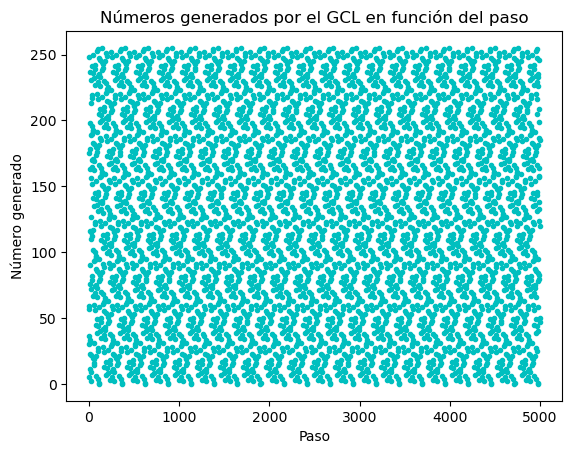

In [25]:
# Gramos un gráfico de los números generados en función del paso dado

#Volvemos a definir los numeros a graficar, esta vez muchos más

plotnumeros = rfx.gclz(10, 57, 1, 256, 5000)

plt.plot(plotnumeros, 'c.')
plt.xlabel('Paso')
plt.ylabel('Número generado')
plt.title('Números generados por el GCL en función del paso')
plt.show()